In [1]:
import tensorflow as tf
import numpy as np

In [2]:
import os
root_dir = r"D:\Machin_learning\Datasets\brain tumor"
train_dir = os.path.join(root_dir, "train")
test_dir = os.path.join(root_dir, "test")
print(os.listdir(train_dir), os.listdir(test_dir)) 


['glioma_tumor', 'meningioma_tumor', 'no_tumor', 'pituitary_tumor'] ['glioma_tumor', 'meningioma_tumor', 'no_tumor', 'pituitary_tumor']


In [3]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_data_gen = ImageDataGenerator(rescale=1./255,
                                    rotation_range=40,
                                    width_shift_range=0.2,
                                    height_shift_range=0.2,
                                    shear_range=0.2,
                                    zoom_range=0.2,
                                    horizontal_flip=True,
                                    fill_mode='nearest')
test_data_gen = ImageDataGenerator(rescale=1./255)


In [4]:
train_data =train_data_gen.flow_from_directory(train_dir,
                                                target_size=(224,224),
                                                batch_size=32,
                                                class_mode='categorical',
                                                color_mode='rgb',
                                                shuffle=True)
test_data = test_data_gen.flow_from_directory(test_dir,
                                                target_size=(224,224),
                                                batch_size=32,
                                                class_mode='categorical',
                                                color_mode='rgb',
                                                shuffle=False)

print(train_data.class_indices.items())
print(test_data.class_indices.items())


Found 2870 images belonging to 4 classes.
Found 394 images belonging to 4 classes.
dict_items([('glioma_tumor', 0), ('meningioma_tumor', 1), ('no_tumor', 2), ('pituitary_tumor', 3)])
dict_items([('glioma_tumor', 0), ('meningioma_tumor', 1), ('no_tumor', 2), ('pituitary_tumor', 3)])


In [5]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout, BatchNormalization
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.losses import mean_squared_error

In [6]:

model = Sequential()

model.add(Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(224, 224, 3)))
model.add(Conv2D(32, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.2))

model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.2))

model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.2))

model.add(Conv2D(256, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D(2, 2))
model.add(Dropout(0.2))

model.add(Flatten())

model.add(Dense(128, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(64, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Dense(4, activation='softmax'))

model.summary()

c:\Users\euiso\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 224, 224, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 224, 224, 32)   │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 112, 112, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 112, 112, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 112, 112, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 112, 112, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 56, 56, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 56, 56, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 56, 56, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 56, 56, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 28, 28, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 28, 28, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 28, 28, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 14, 14, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 14, 14, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 50176)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     6,422,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 64)             │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 4)              │           260 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 7,014,116 (26.76 MB)

 Trainable params: 7,013,732 (26.76 MB)

 Non-trainable params: 384 (1.50 KB)

In [7]:
# from tensorflow.keras.callbacks import ReduceLROnPlateau, ModelCheckpoint, EarlyStopping, TensorBoard

# checkpoint = ModelCheckpoint('model.h5', monitor='val_loss', verbose=1, save_best_only=True, mode='auto')
# tensorboard = TensorBoard(log_dir='./logs', histogram_freq=1, embeddings_freq=1, write_graph=True, write_images=True)
# stopping = EarlyStopping(monitor='val_loss', mode='min', patience=5, verbose=1)
# reduceLR = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=5, verbose=1, mode='auto', min_delta=0.0001, cooldown=0, min_lr=0)

In [8]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['acc'])
history = model.fit(train_data, epochs=30, validation_data=test_data, batch_size=32,)
history.history.keys()

Epoch 1/30


c:\Users\euiso\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:120: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


90/90 ━━━━━━━━━━━━━━━━━━━━ 90s 952ms/step - acc: 0.3260 - loss: 1.8904 - val_acc: 0.2411 - val_loss: 3.7454
Epoch 2/30
90/90 ━━━━━━━━━━━━━━━━━━━━ 82s 891ms/step - acc: 0.4117 - loss: 1.4920 - val_acc: 0.2589 - val_loss: 7.4296
Epoch 3/30
90/90 ━━━━━━━━━━━━━━━━━━━━ 82s 897ms/step - acc: 0.4408 - loss: 1.3953 - val_acc: 0.2411 - val_loss: 1.9324
Epoch 4/30
90/90 ━━━━━━━━━━━━━━━━━━━━ 82s 897ms/step - acc: 0.4621 - loss: 1.2991 - val_acc: 0.2868 - val_loss: 1.8731
Epoch 5/30
90/90 ━━━━━━━━━━━━━━━━━━━━ 87s 945ms/step - acc: 0.4777 - loss: 1.2281 - val_acc: 0.2614 - val_loss: 6.2788
Epoch 6/30
90/90 ━━━━━━━━━━━━━━━━━━━━ 88s 955ms/step - acc: 0.4670 - loss: 1.2216 - val_acc: 0.2157 - val_loss: 2.6129
Epoch 7/30
90/90 ━━━━━━━━━━━━━━━━━━━━ 86s 937ms/step - acc: 0.5057 - loss: 1.1637 - val_acc: 0.2868 - val_loss: 1.7465
Epoch 8/30
90/90 ━━━━━━━━━━━━━━━━━━━━ 84s 912ms/step - acc: 0.5004 - loss: 1.1377 - val_acc: 0.2437 - val_loss: 3.9085
Epoch 9/30
90/90 ━━━━━━━━━━━━━━━━━━━━ 82s 894ms/step - acc:

dict_keys(['acc', 'loss', 'val_acc', 'val_loss'])

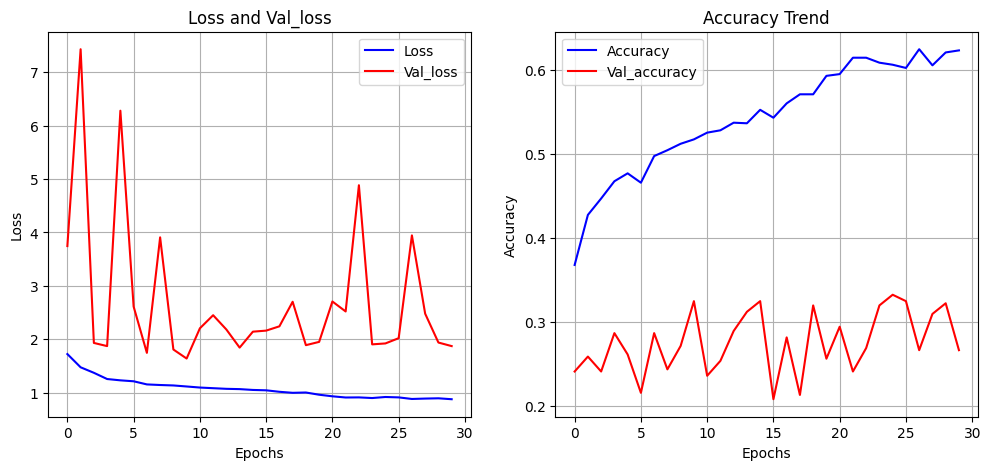

In [9]:
history.history.keys()

import matplotlib.pyplot as plt

plt.figure(figsize=(12 , 5))

plt.subplot(1,2,1)
plt.plot(history.history['loss'] , color= 'blue' , label='Loss')
plt.plot(history.history['val_loss'] , color= "red" ,label='Val_loss')
plt.title('Loss and Val_loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid()

plt.subplot(1,2,2)
plt.plot(history.history['acc'] , color='blue', label='Accuracy')
plt.plot(history.history['val_acc'], color='red', label='Val_accuracy')
plt.title('Accuracy Trend')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid()


plt.show()